In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()

# reshaping data...each image is 32x32x3 (RGB)
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [4]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [6]:
# train the model usign SGD
# WARNING: THIS TAKES A LONG TIME IF YOU DON'T HAVE GPU SUPPORT
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 216us/step - loss: 1.8341 - acc: 0.3461 - val_loss: 1.7083 - val_acc: 0.3825
Epoch 2/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.6477 - acc: 0.4175 - val_loss: 1.6015 - val_acc: 0.4297
Epoch 3/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.5671 - acc: 0.4457 - val_loss: 1.5879 - val_acc: 0.4338
Epoch 4/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.5094 - acc: 0.4678 - val_loss: 1.5428 - val_acc: 0.4559
Epoch 5/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.4616 - acc: 0.4835 - val_loss: 1.4609 - val_acc: 0.4821
Epoch 6/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.4217 - acc: 0.4988 - val_loss: 1.5421 - val_acc: 0.4480
Epoch 7/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.3846 

50000/50000 [==============================] - 9s 176us/step - loss: 0.3197 - acc: 0.8969 - val_loss: 1.6474 - val_acc: 0.5612
Epoch 60/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.3023 - acc: 0.9045 - val_loss: 1.7289 - val_acc: 0.5370
Epoch 61/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.2883 - acc: 0.9099 - val_loss: 2.1685 - val_acc: 0.5017
Epoch 62/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.2789 - acc: 0.9136 - val_loss: 1.7630 - val_acc: 0.5570
Epoch 63/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.2622 - acc: 0.9188 - val_loss: 1.8243 - val_acc: 0.5388
Epoch 64/100
50000/50000 [==============================] - 9s 178us/step - loss: 0.2514 - acc: 0.9235 - val_loss: 2.0144 - val_acc: 0.5179
Epoch 65/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.2433 - acc: 0.9253 - val_loss: 1.9452 - val_acc: 0.5384
Epoch 66/100
50000/50000 [=======

In [7]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       0.62      0.69      0.65      1000
 automobile       0.66      0.66      0.66      1000
       bird       0.49      0.45      0.47      1000
        cat       0.41      0.39      0.40      1000
       deer       0.51      0.51      0.51      1000
        dog       0.46      0.48      0.47      1000
       frog       0.61      0.61      0.61      1000
      horse       0.63      0.62      0.63      1000
       ship       0.69      0.71      0.70      1000
      truck       0.62      0.58      0.60      1000

avg / total       0.57      0.57      0.57     10000



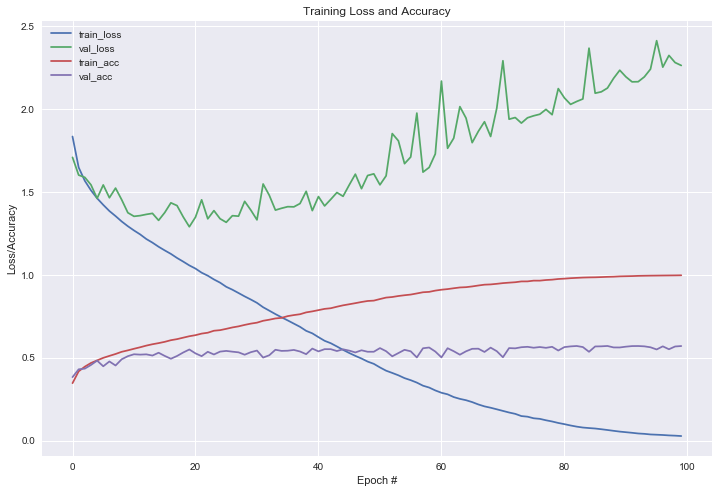

In [8]:
import seaborn as sns

%matplotlib inline
sns.set()

# plot the training loss and accuracy
plt.figure(figsize=(12,8))
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend();

So we only got around 57% accuracy. If we look at the plot above we see train loss keeps going steady down, but after the 10th epoch we are already **overfitting** as the val_loss stops going down and actually goes up as we continue the training.

Notice our training accuracy goes to 1 and our validation accuracy goes to 0. 

Simple fact: basic feedforward networks with fully connected layers are not suitable for challenging image datasets.